In [1]:
import os

import atiim


### Setup data

In [2]:
data_dir = '/Users/d3y010/projects/atiim/data'

gage_data_file = os.path.join(data_dir, 'tabular', 'water_level.csv')
dem_file = os.path.join(data_dir, 'raster', 'run_1_all.sdat')
basin_shp = os.path.join(data_dir, 'shp', 'basin_1.shp')
gage_shp = os.path.join(data_dir, 'shp', 'gage_location_1.shp')

output_dir = '/Users/d3y010/projects/atiim/test'

run_name = 'test_1'
elevation_interval = 0.1
hour_interval = 1.0


### Plot the water surface elevation time series from the gage data

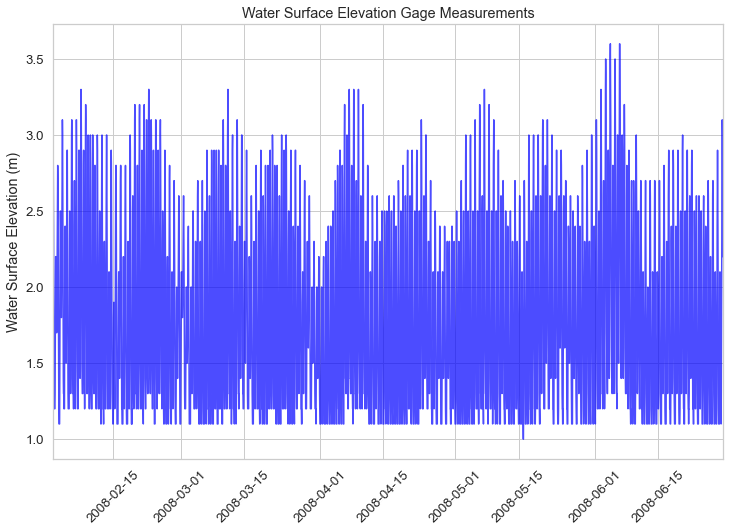

In [3]:
atiim.plot_gage_wse(gage_data_file=gage_data_file,
                    save_plot=True,
                    output_file=os.path.join(output_dir, 'plot_gage_wse.png'),
                    show_plot=True)


### Plot the cumulative distribution of water surface elevation from the gage data

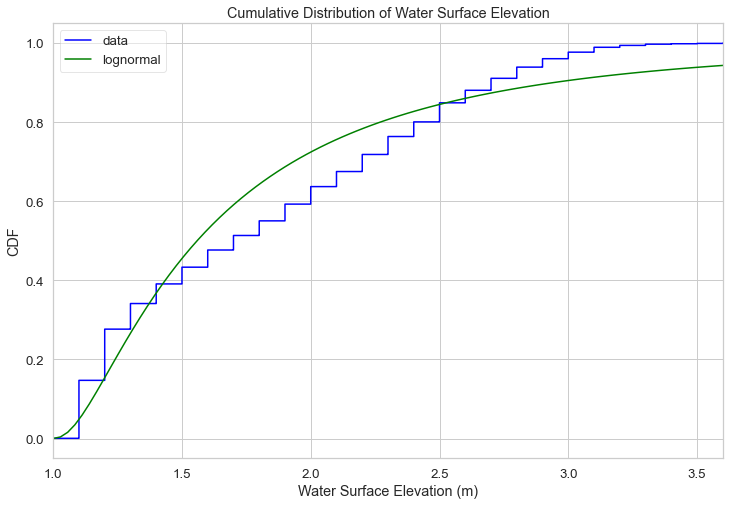

In [4]:
atiim.plot_wse_cdf(gage_data_file)


### Plot the probability density of water surface elevation from the gage data

### Plot the exceedance probability of water surface elevation from the gage data

### Simulate inundation over the area of interest using the gage data

In [5]:
%%time

df = atiim.simulate_inundation(dem_file=dem_file,
                               basin_shp=basin_shp,
                               gage_shp=gage_shp,
                               gage_data_file=gage_data_file,
                               output_directory=output_dir,
                               run_name=run_name,
                               write_csv=True,
                               elevation_interval=elevation_interval,
                               hour_interval=hour_interval,
                               n_jobs=1)


Total Time Steps:  3568
Days Verification:  148
Minimum DEM Elevation:  0.68
Maximum DEM Elevation:  19.89
Minimum Water-Surface Elevation:  1.0
Maximum Water-Surface Elevation:  3.6
Bounded DEM Elevation:  1.0
Bounded DEM Elevation:  3.6
CPU times: user 2.15 s, sys: 143 ms, total: 2.29 s
Wall time: 2.4 s


#### This returns a data frame containing inundation metrics

In [6]:
df.head(2)

,id,frequency,elevation,area,hectares,perimeter,hect_hours,run_name
0,100,2,1.0,1785.3750,0.178538,631.5,0.357075,test_1
0,110,523,1.1,2291.0625,0.229106,642.0,119.822569,test_1


#### Plot the hectare hours of inundation

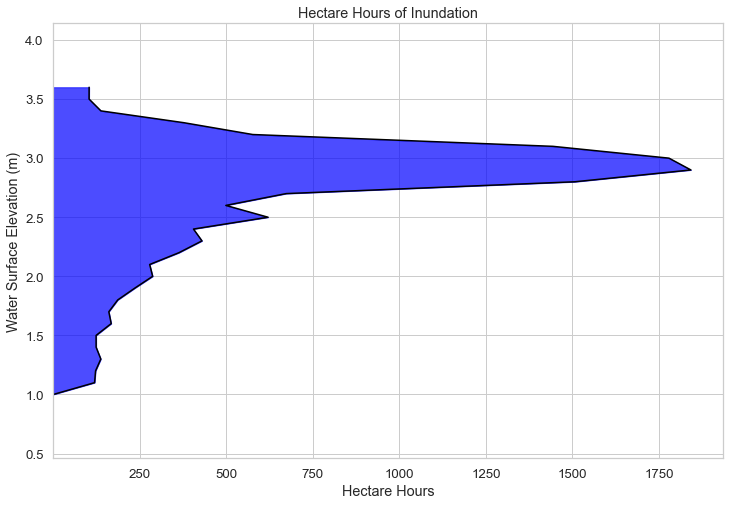

In [7]:
atiim.plot_hectare_hours_inundation(df)


### Generate hypsometric curve data

In [8]:
hydf = atiim.hypsometric_curve(dem_file=dem_file,
                               elevation_interval=0.1)

hydf.head(2)


,dem_elevation,dem_area_at_elevation,dem_percent_area
0,0.682365,516908.250,1.000000
1,0.782365,516598.875,0.999401


### Plot the hypsometric curve by area

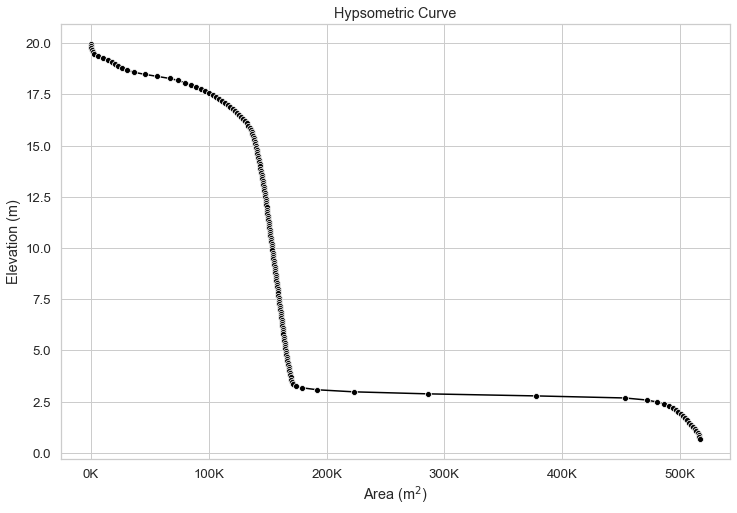

In [9]:
atiim.plot_hypsometric(hydf)
